# Glacial Cycles (Pollard 1982)
## Amita and Miriam

Walkthrough: https://youtu.be/0KXWQFhD840 

### Introduction
Ice sheet dynamics is central to understanding Earth's history and future, especially given rising global temperatures. Melting of ice sheets contributes directly to sea level changes which has negative impacts on many communities and wildlife. However, the long term dynamics of ice sheet melt and formation, caused by changes in Earth's orbit, have facinating effects. Understanding the long term dynamics well allows us to distinguish expected behavior from abnormal melting. <br>

##### Milankovich Cycles
Milankovich cycles are small perterbations in Earth's orbit that change the total level of sunlight the planet recieves [1]. The main parameters are eccentricity, or the shape of the orbit, obliquity, or the angle of tilt of Earth's axis, and precession, the direction Earth's axis of rotation is pointed. These three variations occur at well known intervals which align with past ice ages, confirmed from ice core data. (Pollard 1982). The main cycles occur in intervals of 20, 40, and 100 kyr. Previous models have captures the 20 and 40 kyr cycles but failed to capture the 100 kyr cycle. The 100 kyr cycle is especially prevelant in Northern Hemisphere ice sheets which is the focus of this paper [2].

##### Previous Work
There are many models to simulate changing ice sheet levels over time. Oerlemans (1980) [3] proposes a similar nonlinear diffusion model however they include effects of global temperature changes caused by Milankovitch cycles and the effects of changing water levels underneath the ice sheet. Weertman (1976) [4] provides a different method to calculate the accumulation rate of snow on the ice sheet and preforms a stability analysis. The main difference between Pollard (1982) and other ice sheet models is the ability to capture the 100 kyr Milankovitch cycle.

### Equations and Parameters
The fundamental process being studied is the diffusion of ice sheets over time. The thickness, $H$, of an ice sheet over time can be modeled with a nonlinear diffusion equation:
$$ \frac{\partial H}{\partial t} = A \frac{\partial}{\partial x} \left[H^{\alpha}\left| \frac{\partial(H + h)}{\partial x}\right|^{\beta}\frac{\partial(H + h)}{\partial x}\right] + G(H + h, x, \text{orbit})$$ 

$t$: time <br>
$x$: distance from northern boundary to spacial step <br>
$h$: the elevation of the bedrock surface above a fixed reference level (taken as the present mean sea level) <br>

For this model: <br>
$A = 5.77\times10^{-4} \text{m}^{-3}\text{yr}^{-1}$<br>
$\alpha = 5$<br>
$\beta = 2$<br> 

$G$ is the net annual mass balance on the ice sheet surface, depending on snowfall and ice melt, and is given by<br>

$$ G = \begin{cases}
a(h+h' -E) - b(h+h'-E)^2 & h+h' - E \leq 1500 \text{ m} \\
0.56 & h+h' - E > 1500 \text{ m}
\end{cases} \text{     m yr}^{-1} $$
where $E$ is defined 
$$E = E_0(x) + k \Delta Q$$
$k$: insolation sensitivity <br>
$E_0(x)$: the present equlibrium line<br>
$\Delta Q$: is the difference in the summer half-year insolation at $55 \degree$ N from that of the present <br>

##### Assumptions
Several assumptions were made. The bedrock is assumed to be in isostatic equlibrium meaning the effects of bedrock deformation due to the weight of the ice sheet are not taken into account. As a result we can substitute $h = -rH$ where $r = 0.3$ is the ratio of ice density to rock density. When we make this substitution, the PDE becomes
$$ \frac{\partial H}{\partial t} = A(0.7)^{\beta + 1}  \frac{\partial}{\partial x} \left[H^{\alpha}\left| \frac{\partial(H)}{\partial x}\right|^{\beta}\frac{\partial(H)}{\partial x}\right]  $$
The equation is formulated such that east-west diffusion is neglected as well, meaning the ice sheet is only changing height in the north-south direction. Further, the function $G$ to model snow accumulation has many simplifications. The equilibrium line $E$ is taken to have constant slope, and the function doesn't incorporate temperature or the amount of water underneath the ice sheet.

##### Modifications
The paper runs the model for the past 700,000 years however due to the method we chose, stability, and time constraints, our code solves the PDE for the past 50,000 years. This is so that the 20 kyr and 40 kyr Milankovich cycles are captured. Further, the paper integrates from 74 N to 30 N, and for similar reasons as the time modifications, our model is evaluated from 74 N to 65 N which is about 1000 km. Due to this change, in the G function, we instead calculate the summer half year insolation compared to a latitude of 68 N. 

##### Boundary Conditions & Initial Conditons
<img src="boundaryFigure.png" width=658 height=468 /> <br>
To find the boundary conditions, we assume the cross-section of the ice sheet is initially a triangle with length  $1000 \text{ km}$ (the distance between model boundaries of $74 \degree$ N and $65 \degree$ N). After adjusting the initial height, we found 920 m to be a reasonable starting point that allowed for stability. <br> <br>
The boundary condition at the northern boundary is a no flux Neumann. This is because we want to enforce the dome shape of the ice sheet so the top should have a flat (0) slope. The southern boundary is where the ice sheet meets the ocean so it should be at sea level, so we enforce a Dirichlet boundary with $h=0$.

### Numerical Methods
We chose to use a Forward Euler Scheme. We decided to use this numerical method because it is easier to implement and it does not require matrix multiplication, which makes it computationally much faster to implement. However, the Forward Euler Scheme does have it's downsides, as it is more unstable, so we had to make modifications to our model in order to stabalize it. Further, since we need to solve for the diffusivity and then the height, our error increases and stability decreases. <br>

We start with our equation
$$ \frac{\partial H}{\partial t} = A(0.7)^{\beta + 1}  \frac{\partial}{\partial x} \left[H^{\alpha}\left| \frac{\partial(H)}{\partial x}\right|^{\beta}\frac{\partial(H)}{\partial x}\right]  $$
This is a diffusion equation where the diffusivity is spacially dependent and depends on $H$. We have
$$ D = A(0.7)^{\beta + 1}   H^{\alpha}\left| \frac{\partial(H)}{\partial x}\right|^{\beta} $$
$$ \implies \frac{\partial H}{\partial t} = \frac{\partial}{\partial x} \left[ D \frac{\partial H}{\partial x} \right]$$
Using the chain rule:
$$\frac{\partial H}{\partial t} = \frac{\partial D}{\partial x} \frac{\partial H}{\partial x}  + D \frac{\partial ^2 H}{\partial x^2} $$
Now we need to discretize. The LHS is given by
$$ \frac{H_i^{t+1} - H_i^t}{\Delta t}$$
The RHS is given by
$$\frac{D_{i+1} - D_{i-1} }{2 \Delta x} * \frac{H_{i+1} - H_{i-1}}{2 \Delta x} + D_i \frac{H_{i+1} - 2H_i + H_{i+1}}{\Delta x^2} $$
After equating and collecting like terms:
$$H_i^{t+1} = \frac{H_{i-1}}{4\Delta x^2 \Delta t} \left[ -D_{i+1} + D_{i-1} + 4D_i \right] + \frac{H_i}{\Delta t} \left[ \frac{-2 D_i}{\Delta x^2} + \frac{1}{\Delta t}  \right] + \frac{H_{i+1}}{4\Delta x^2 \Delta t} \left[ D_{i+1} - D_{i-1} + 4D_i \right] $$
Let
$$\lambda_i  = \frac{1}{4\Delta x^2 \Delta t} \left[ -D_{i+1} + D_{i-1} + 4D_i \right]$$
$$ \pi_i = \frac{1}{\Delta t} \left[ \frac{-2 D_i}{\Delta x^2} + \frac{1}{\Delta t}  \right]$$
$$ \rho_i = \frac{1}{4\Delta x^2 \Delta t} \left[ D_{i+1} - D_{i-1} + 4D_i \right] $$
Now we can construct a matrix where the lower diagonal is given by $\lambda_i$, the center diagonal is given by $\pi_i$, and the upper diagonal is given by $\rho_i$:
$$M = \begin{bmatrix} 
\pi_1 & \rho_1 & 0 & \dots & & & 0 \\
\lambda_2 & \pi_2 & \rho_2 & 0 & \dots & & 0 \\
0 & \lambda_3 & \pi_3 & \rho_3 & 0 & \dots & 0 \\
\vdots & & \ddots & \ddots & \ddots & & \vdots \\ 
\\
0 & \dots & & & & \lambda_n & \pi_n
\end{bmatrix} $$

As a system the problem becomes 
$$M \begin{bmatrix}
H_1 \\
H_2 \\
\vdots \\
H_n
 \end{bmatrix} = 
 \begin{bmatrix}
H_1^{t+1} \\
H_2^{t+1} \\
\vdots \\
H_n^{t+1}
 \end{bmatrix}
 $$

 Now we need to incorporate the boundary conditions specified earlier. For the northern boudary, we want $\frac{\partial H}{\partial x} = 0$. When we substitute this value into our descritized equation, we get $$ \frac{H_i^{t+1} - H_i^t}{\Delta t} = 0 \implies H_i^{t+1} = H_i^t $$
 Thus, at each each time step we must set the current $H$ vector to have the same first element as the $t+1$ H vector. We also want $H_1 = H_2$, so we modify the first row of $M$ such that $\pi_1 = 1$ and $\rho_1$ = 1. <br>
 
 For the southern boundary, we need to enforce $H = 0$. So the last row of $M$ should be all zeros except final entry which should be 1. Thus the $M$ matrix become
 $$M = \begin{bmatrix} 
1 & -1 & 0 & \dots & & & 0 \\
\lambda_2 & \pi_2 & \rho_2 & 0 & \dots & & 0 \\
0 & \lambda_3 & \pi_3 & \rho_3 & 0 & \dots & 0 \\
\vdots & & \ddots & \ddots & \ddots & & \vdots \\ 
\\
0 & \dots & & & & & 1
\end{bmatrix} $$


### Implementation
##### Importing, time stepping, and grid spacing


In [9]:
import numpy as np
import climlab # package used for calculating orbital parameters overtime
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation
import matplotlib.pyplot as plt
from scipy.sparse import diags



#timesteping for calculations
t_i = 0
t_f = -50000 #run model for the past 50,000 years
d_t = 0.1  #use time step of about 36 days, needed for stability
t = np.arange(t_f, t_i+1, d_t)

#timesteping for orbital parameters
d_t_orb = 100 #use time step of 100 years
t_orb = np.arange(t_f, t_i+1, d_t_orb)
t_kyr = (t_orb/(1000)) # years in kyr, needed to calculate orbital parameters


#grid spacing for calculations
x_i = 0 # meters,  corresponds to 74 degrees N latitute (northern boundary) 
x_f = 1000000 # meters,  corresponds to 60 degrees N latitude (southern boundary)
x = np.linspace(x_i, x_f, 38)
d_x = x_f/len(x)

#grid spacing for orbital parameters
x_i_orb = 65 # degrees North latitude (southern boundary)
x_f_orb = 74 # degrees North latitude (northern boundary)
d_x_orb= 0.25 #0.5 degrees as spacial step equivalent to 55km
x_orb = np.arange(x_i_orb, x_f_orb+0.25, d_x_orb)


##### Calculating orbital parameters

In [10]:
#Calculating Orbital Parameters
days = np.linspace(1,365.24, 365)/365 * 365.24
orb = OrbitalTable.interp(kyear=t_kyr ) #calculate orbital parameters for past 700,000 years, every 100 years

Q = daily_insolation(x_orb, days, orb) #calculate daily insolation per every 500 years based on orbit parameters


#Calculating Summer Half-Year Insolation
delta_Q = np.zeros((len(x_orb), len(t_kyr)))

for i in range(len(t_kyr)):
    daily_68 = Q[7, :, i]
    median_insolation_68 = np.median(daily_68)
    summer_total_68 = sum(daily_68[daily_68>median_insolation_68])
    for j in range(len(x_orb)):
        daily = Q[j,:, i]
        median_insolation = np.median(daily)
        summer_total = sum(daily[daily> median_insolation])
        #now need to subtract the 63 degree N summer half year from each latitute to find delta Q
        delta_Q[j, i] = summer_total - summer_total_68



### Calculating Accumulation Based On Orbital Parameters

In [11]:
k = 25 #meters light-years^-1 day, insolation sensitivity
a = 0.81e-3 #years^-1
b = 0.3e-6 #meters^-3 years^-1

x_dis_south_km = np.array([0,28, 56, 83, 111, 139,  167, 194, 222, 250, 278, 306, 333, 361, 389, 
                           417, 444, 472, 500, 528, 556, 583, 611, 639, 667, 694, 722, 750, 778, 
                           806, 833, 861, 889, 917, 945, 972, 1000 ]) # Distance from 74 N to the other spacial points in km

x_dis_south = x_dis_south_km * 1000

E0 = (x_dis_south * 9e-4) - 6.57e-2 # Equlibrium Line


def E(t):
    return E0 + k * delta_Q[:,t] 

# Calculates Ice Accumulation Based on Year
def G(t, h):
    G_vec = np.zeros(len(h))
    E_vals = E(t)
    for i in range(len(h)-1):
        if (h[i] - E_vals[i] >= 1500):
            G_vec[i] = a*(h[i]-E_vals[i]) - b*(h[i]-E_vals[i])**2
        else:
            G_vec[i] = 0.56
    return G_vec

### Solve Non Linear Diffusion


In [12]:
#Solve Non Linear Diffusion
A = 5.77e-4 #meters^-3 years^-1
alpha = 5
beta = 2

# Initialize glacier 
# want the northern part of glacier to be 10 m and decrease moving south so the southern border is 0 m
h_ini = np.linspace(920, 0, len(x)) 


# calculate diffusivity based on time step
def D(H_vec):
    Diff = np.zeros(len(H_vec))
    Diff = ((abs(np.gradient(H_vec, d_x))**beta * H_vec**alpha)  / (2*d_x)**beta ) * A * 0.7**(beta+1)
    return Diff

## Functions to calculate coefficients ##
def Alpha(D_vec):
    Alpha_diag = np.zeros((len(D_vec))-1)
    for i in range(1, len(D_vec)-1):
        Alpha_diag[i-1] = d_t/(4*d_x**2) * ( -D_vec[i+1] + D_vec[i-1] + 4 * D_vec[i])
    Alpha_diag[-1] = 0
    return Alpha_diag

def Beta(D_vec):
    Beta_diag = np.zeros(len(D_vec))
    for i in range(1, len(D_vec)-1):
        Beta_diag[i] = d_t * ( (-2 * D_vec[i]) / (d_x**2) + (1/d_t))    
    Beta_diag[0] = 1
    Beta_diag[-1] = 1
    return Beta_diag

def Gamma(D_vec):
    Gamma_diag = np.zeros(len(D_vec)-1)
    for i in range(1, len(D_vec)-1):
        Gamma_diag[i] = (d_t)/(4*d_x**2) * ( D_vec[i+1] - D_vec[i-1] + 4 * D_vec[i])
        
    Gamma_diag[0] = -1
    return Gamma_diag


# Solving equation in loop

def SolvePDE(use_orbital_params):
    # Initializing
    if (use_orbital_params == False):
        h_ini = np.linspace(10, 0, len(x)) 
    else:
        h_ini = np.linspace(920, 0, len(x)) 
    
    sols = np.zeros((len(x), len(t)))
    D_ini = D(h_ini)

    diffs = np.zeros((len(D_ini), len(t)))
    sols[:, 0] = h_ini
    diffs[:, 0] = D_ini
    h = h_ini
    for i in range(len(t)-2):
        if (i % 50000 == 0):
            percent = int((i / 500000)*100)
            print(f"{percent} % Completed")
    #Solve for diffusivity value at each grid point
        Diffusivity = D(h)
        diffs[:, i] = Diffusivity
        Cd = Diffusivity*d_t / d_x**2
        
        #calculate entries in P matrix
        lower_diag = Alpha(Diffusivity)
        center_diag = Beta(Diffusivity)
        upper_diag = Gamma(Diffusivity)

        #Build M matrix to solve
        diagonals = [lower_diag, center_diag, upper_diag]
        M = diags(diagonals, [-1, 0, 1]).toarray()

        #Add yearly accumulation 
        if (use_orbital_params == True):
            if (i % 100 == 0): # Recalculate accumulation rates every 100 years 
                G_vals = G(int(i/1000), h)/1000
                h = h + (d_t * G_vals)
            else:
                h = h + (d_t * G_vals)
        else:
            h = h + (d_t * 1) # uniform accumulation of 1 meter per year


        h[-1] = 0

        h_new = np.matmul(M, h)
        h_new    = np.maximum(h_new,0)
        h_new[0] = h[0]
        h = h_new

        #update solutions
        sols[:, i+1] = h
    return diffs, sols

diffs_unif_acc, sols_unif_acc = SolvePDE(False)
diffs, sols = SolvePDE(True)

0 % Completed
10 % Completed
20 % Completed
30 % Completed
40 % Completed
50 % Completed
60 % Completed
70 % Completed
80 % Completed
90 % Completed
100 % Completed
0 % Completed
10 % Completed
20 % Completed
30 % Completed
40 % Completed
50 % Completed
60 % Completed
70 % Completed
80 % Completed
90 % Completed
100 % Completed


### Results

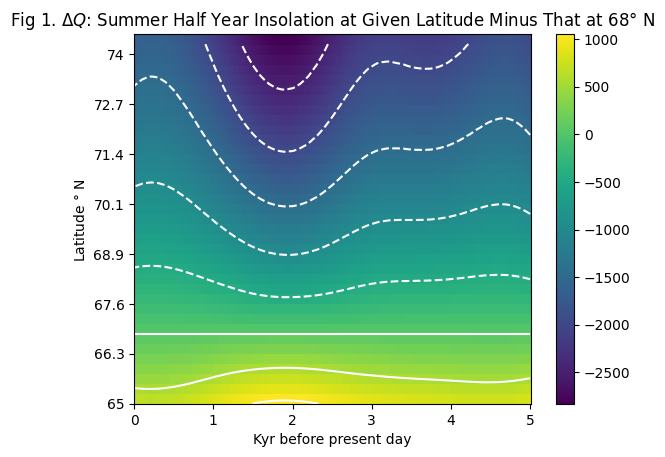

In [28]:
# Plotting Delta Q
plt.figure()
ax = plt.axes()
plt.pcolor(delta_Q)
plt.colorbar()
plt.contour(delta_Q, colors = 'white')
ax.set_xticks([0, 100, 200, 300, 400, 500], ["0", "1", "2", "3", "4", "5"])
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35],[ "65", "66.3", "67.6",  "68.9", "70.1", "71.4", "72.7", "74" ])
plt.xlabel("Kyr before present day")
plt.ylabel("Latitude $\degree $ N ")
plt.title("Fig 1. $\Delta Q$: Summer Half Year Insolation at Given Latitude Minus That at 68$\degree$ N" )
plt.show()



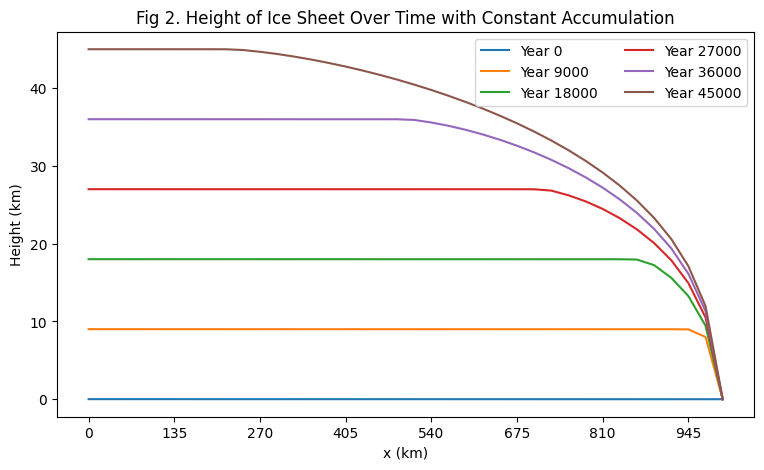

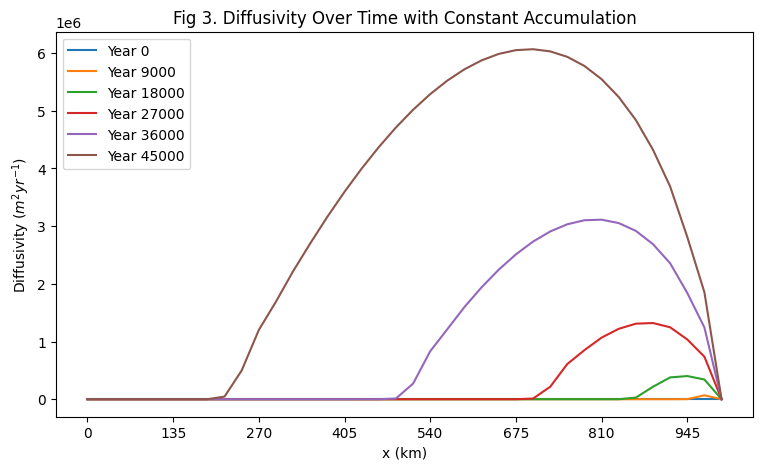

In [29]:
plt.figure(figsize=(9, 5))
ax = plt.axes()
for i in range(len(t)-1):
    if (i % 90000 == 0):
        year = int(i*d_t)
        plt.plot(sols_unif_acc[:, i], label=f"Year {year}")

ax.set_yticks([0, 10000, 20000, 30000, 40000], ["0", "10", "20", "30", "40"])
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35],[ "0", "135", "270",  "405", "540", "675", "810", "945" ])
plt.legend(ncol = 2)
plt.xlabel("x (km)")
plt.ylabel("Height (km)")
plt.title("Fig 2. Height of Ice Sheet Over Time with Constant Accumulation")
plt.show()

plt.figure(figsize=(9, 5))
ax = plt.axes()
for i in range(len(t)-1):
    if (i % 90000 == 0):
        year = int(i*d_t)
        plt.plot(diffs_unif_acc[:, i], label=f"Year {year}")
plt.legend()
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35],[ "0", "135", "270",  "405", "540", "675", "810", "945" ])
plt.xlabel("x (km)")
plt.ylabel("Diffusivity ($m^2 yr^{-1}$)")
plt.title("Fig 3. Diffusivity Over Time with Constant Accumulation")
plt.show()

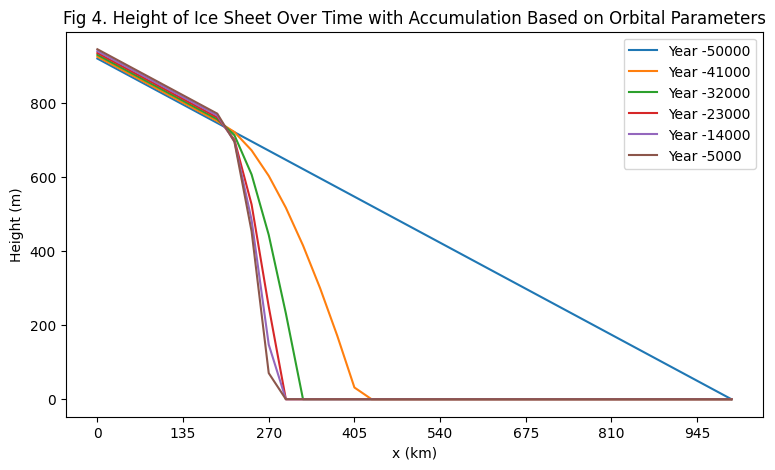

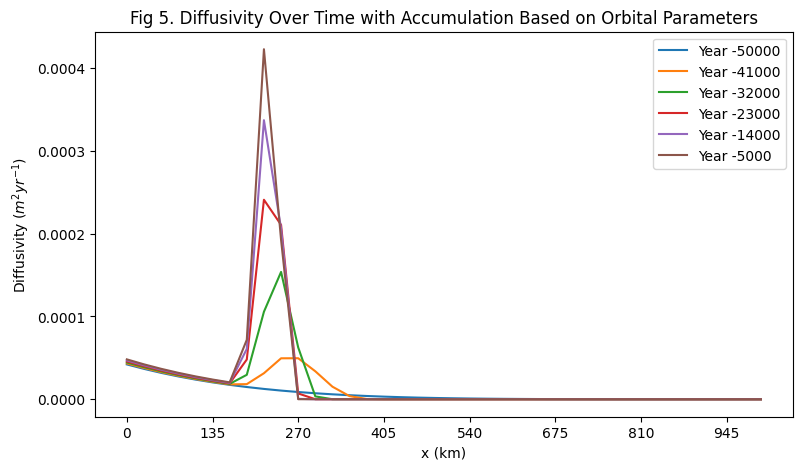

In [30]:
plt.figure(figsize=(9, 5))
ax = plt.axes()
for i in range(len(t)-1):
    if (i % 90000 == 0):
        year = 50000 - int(i*d_t)
        plt.plot(sols[:, i], label=f"Year {-year}")

plt.legend()
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35],[ "0", "135", "270",  "405", "540", "675", "810", "945" ])
plt.xlabel("x (km)")
plt.ylabel("Height (m)")
plt.title("Fig 4. Height of Ice Sheet Over Time with Accumulation Based on Orbital Parameters")
plt.show()


plt.figure(figsize=(9, 5))
ax = plt.axes()
for i in range(len(t)-1):
    if (i % 90000 == 0):
        year = 50000 - int(i*d_t)
        plt.plot(diffs[:, i], label=f"Year {-year}")

plt.legend()
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35],[ "0", "135", "270",  "405", "540", "675", "810", "945" ])
plt.xlabel("x (km)")
plt.ylabel("Diffusivity ($m^2 yr^{-1}$)")
plt.title("Fig 5. Diffusivity Over Time with Accumulation Based on Orbital Parameters")
plt.show()

### Results
We simulated two scenarios of ice sheet height evolution. 

The first scenario does not consider changes in accumulation due to Milankovitch cycles. We implemented a constant accumulation rate of 1 meter per year with the glacier initially being 10 meters tall. We iterate for 50,000 years and the results are shown Fig 2 and 3. 

From Fig 2 we see the ice sheet diffuses along the southern portion, which aligns with what we expected physically since temperature increases as we move south. Fig 3 demonstrates the nonlinear diffusion and shows how more diffusion occurs in the southern portion of the ice sheet. The final height of the ice sheet after 50,000 years is unrealistically tall at around 45 km, however this can be explained by constant accumulation rate. Also, the formulation of the model captures long term dynamics (700,000 years) however since we are only running for 50,000 years, our accumulation rate is likely too high. Regardless, the overall shape of the ice sheet is physically accurate. 

Since the orbital parameters are given for the past 50,000 years, for scenario 2, we model the ice sheet thickness starting from 50,000 years ago and ending as present day. Because of this we use a different initial condition than the constant accumulation scenario. We define the glacier to initially have a height of 920 meters which was calculated from the results in the paper. We see over time the glacier diffuses at different special steps which changes with time. Since the height of the ice sheet at present day is realistic, we know the accumulation based on the orbital parameters is more accurate than the constant accumulation function. Due to limitations of the package used to calculate the parameters, the special steps are quite large which causes the sharp points in the graph. Also due to the instability of the method chosen, a larger grid spacing is required. 

The model demonstrates the pace at which glaciers diffuse which is critical to understand the effects of global warming. It also demonstrates that despite seeming small, Milankovitch cycles have significant impacts over long periods. 

There are many improvements that could be made to the model. For example, we do not consider bedrock deformation which is a significant effect. Further, a more stable numerical method would allow us to run the model for longer time periods and would be able to capture the cyclic nature of ice sheet volume. 


### References
1. https://science.nasa.gov/science-research/earth-science/milankovitch-orbital-cycles-and-their-role-in-earths-climate/
2. Pollard, David. "A simple ice sheet model yields realistic 100 kyr glacial cycles." Nature 296.5855 (1982): 334-338.
3. Oerlemans, J. "Glacial cycles and ice-sheet modelling." Climatic Change 4.4 (1982): 353-374.
4. Weertman, Johannes. "Milankovitch solar radiation variations and ice age ice sheet sizes." Nature 261.5555 (1976): 17-20.
